# Homework 1

- Phanthat Likitbantoon 63340500040
- Phufa Boonchuatrong 63340500048

## 1. Clustering

In [94]:
import matplotlib.pyplot as plt
import numpy as np

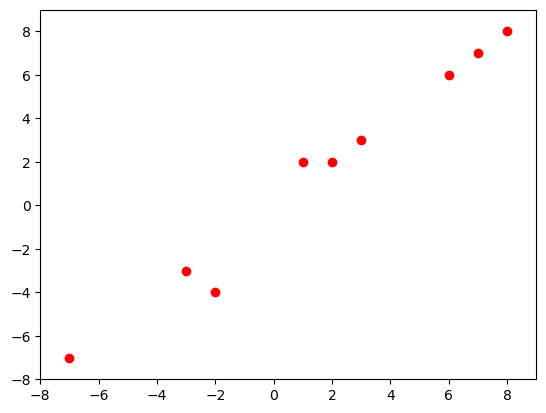

In [95]:
# x axis values
x = [1,3,2,8,6,7,-3,-2,-7]
# corresponding y axis values
y = [2,3,2,8,6,7,-3,-4,-7]
 
# plotting the points 
plt.plot(x, y,'ro')
 
# setting x and y axis range
plt.ylim(-8,9)
plt.xlim(-8,9)

plt.show()

### 1.1. If the starting points are (3,3), (2,2), and (-3,-3). Describe each assign and update step. 
What are the points assigned? What are the updated centroids? You may do this
calculation by hand or write a program to do it.

--> ANS

In [96]:
xc_i = [3,2,-3]
yc_i = [3,2,-3]
mark = ['bo','go','yo']

In [97]:
def euclidian_distance(x1,y1,x2,y2):
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

def remove_centroid_from_sample(xs, ys, xc, yc):
    idx_remove = []
    for i in range(len(xs)):
        for j in range(len(xc)):
            if xs[i] == xc[j] and ys[i] == yc[j]:
                idx_remove.append(i)

    arr1 = np.array(xs)
    arr2 = np.array(ys)

    new_arr1 = np.delete(arr1, idx_remove)
    new_arr2 = np.delete(arr2, idx_remove)

    x_new = new_arr1.tolist()
    y_new = new_arr2.tolist()

    print("Removed =", [xs[i] for i in idx_remove], ", New_List =", x_new)
    print("Removed =", [ys[i] for i in idx_remove], ", New_List =", y_new)

    return x_new, y_new

def mean(data):
    mean = np.mean(data)
    
    return mean


journey = random centroid --> group by euclidence distance --> mean of group --> new centroid --> repeat

In [98]:
def plot_figure(xc, yc, xs, ys, step):
    mark = ['bo','go','yo']
    for i in range(len(xs)):
        plt.plot(xs[i], ys[i],mark[i])
    
    plt.plot(xc, yc,'ro')
    # setting x and y axis range
    plt.ylim(-8,9)
    plt.xlim(-8,9)
    plt.title(f'Repeat = {step}')

    centroid = list(zip(xc, yc))
    assign = [list(zip(i, j)) for i,j in list(zip(xs, ys))]

    print(f' ----------- Step = {step} ----------- ')
    for idx, val in enumerate(centroid):
        print(f'Centroid = {val}')
        print(f'Assign Data to each centroid = {assign[idx]}')
    
    plt.show()

In [99]:
def k_clustering(xs, ys, k, xc_i, yc_i,plot=True):
    if len(xc_i) != len(yc_i) or k != len(xc_i):
        print('Dimension not match')

    xc = [xc_i]
    yc = [yc_i]
    xg = []
    yg = []
    n = 0
    while True: # outter loop repeat n times

        ## Assign centroid
        x_group = [[] for i in range(k)]
        y_group = [[] for i in range(k)]


        for i in range(len(xs)):
            ecd_dis = []
            for c in range(len(xc_i)):
                ecd_dis.append(euclidian_distance(xs[i], ys[i], xc[-1][c], yc[-1][c]))

            x_group[ecd_dis.index(min(ecd_dis))].append(x[i])
            y_group[ecd_dis.index(min(ecd_dis))].append(y[i])

        xg.append(x_group)
        yg.append(y_group)


        ## Update centroid
        temp1 = [mean(x) for x in x_group]
        temp2 = [mean(y) for y in y_group]
        if plot ==  True :
          plot_figure(xc[-1], yc[-1], x_group, y_group, n)

        if temp1 == xc[-1] and temp2 == yc[-1]:
          if k != len(xs):
            xg = xg[-1]
            yg = yg[-1]
          elif k == len(xs):
            xg = xg[0]
            yg = yg[0]

          break

        xc.append(temp1)
        yc.append(temp2)
        n += 1

    return xc, yc, xg, yg


 ----------- Step = 0 ----------- 
Centroid = (3, 3)
Assign Data to each centroid = [(3, 3), (8, 8), (6, 6), (7, 7)]
Centroid = (2, 2)
Assign Data to each centroid = [(1, 2), (2, 2)]
Centroid = (-3, -3)
Assign Data to each centroid = [(-3, -3), (-2, -4), (-7, -7)]


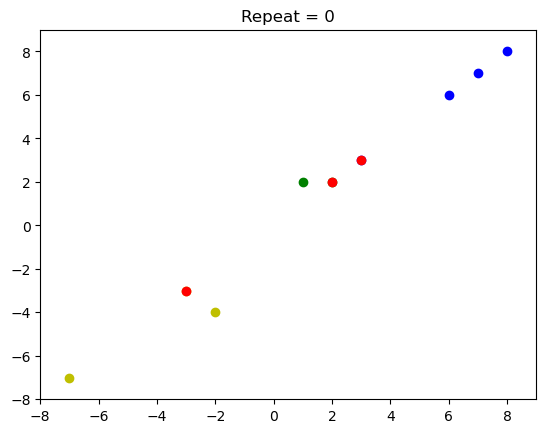

 ----------- Step = 1 ----------- 
Centroid = (6.0, 6.0)
Assign Data to each centroid = [(8, 8), (6, 6), (7, 7)]
Centroid = (1.5, 2.0)
Assign Data to each centroid = [(1, 2), (3, 3), (2, 2)]
Centroid = (-4.0, -4.666666666666667)
Assign Data to each centroid = [(-3, -3), (-2, -4), (-7, -7)]


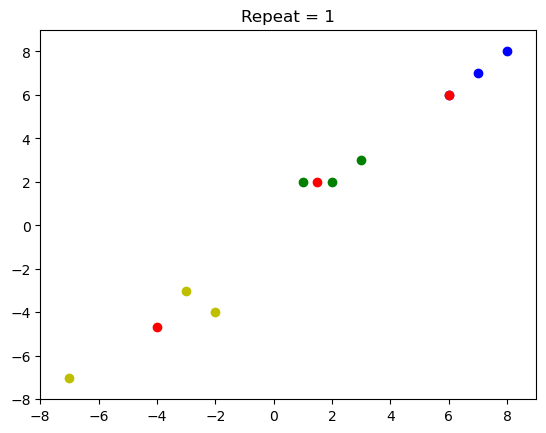

 ----------- Step = 2 ----------- 
Centroid = (7.0, 7.0)
Assign Data to each centroid = [(8, 8), (6, 6), (7, 7)]
Centroid = (2.0, 2.3333333333333335)
Assign Data to each centroid = [(1, 2), (3, 3), (2, 2)]
Centroid = (-4.0, -4.666666666666667)
Assign Data to each centroid = [(-3, -3), (-2, -4), (-7, -7)]


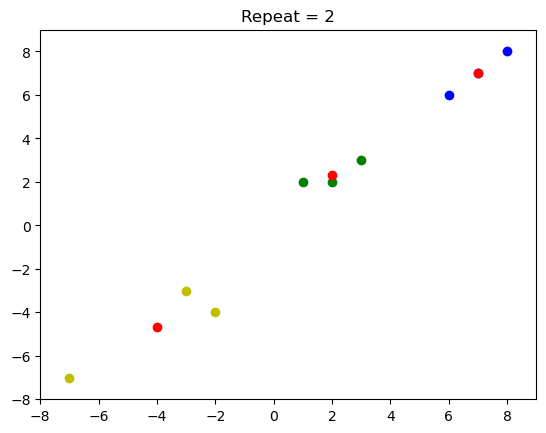

In [100]:
xc, yc, xg, yg = k_clustering(x, y, 3, xc_i, yc_i, plot = True)

### 1.2. If the starting points are (-3,-3), (2,2), and (-7,-7), what happens?

--> ANS

 ----------- Step = 0 ----------- 
Centroid = (-3, -3)
Assign Data to each centroid = [(-3, -3), (-2, -4)]
Centroid = (2, 2)
Assign Data to each centroid = [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)]
Centroid = (-7, -7)
Assign Data to each centroid = [(-7, -7)]


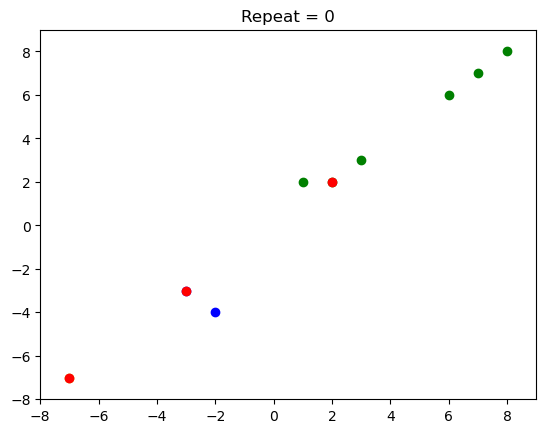

 ----------- Step = 1 ----------- 
Centroid = (-2.5, -3.5)
Assign Data to each centroid = [(-3, -3), (-2, -4)]
Centroid = (4.5, 4.666666666666667)
Assign Data to each centroid = [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)]
Centroid = (-7.0, -7.0)
Assign Data to each centroid = [(-7, -7)]


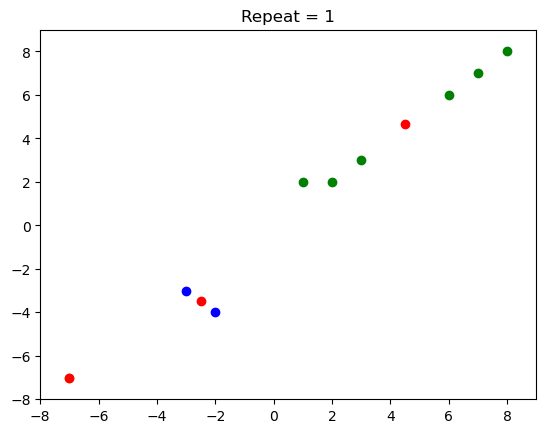

([[-3, 2, -7], [-2.5, 4.5, -7.0]],
 [[-3, 2, -7], [-3.5, 4.666666666666667, -7.0]],
 [[-3, -2], [1, 3, 2, 8, 6, 7], [-7]],
 [[-3, -4], [2, 3, 2, 8, 6, 7], [-7]])

In [101]:
xc_i = [-3, 2, -7]
yc_i = [-3, 2, -7]

k_clustering(x, y, 3, xc_i, yc_i)

### 1.3. Between the two-starting set of points in the previous two questions, which one do you 
think is better? How would you measure the ‘goodness’ quality of a set of starting points?


--> starting point จาก (3,3), (2,2), and (-3,-3) แบบข้อ 1.1 ดีกว่า เพราะว่า เห็นการแบ่งกลุ่มของ data sample ได้อย่างชัดเจนเมื่อเทียบกับ starting point จากข้อ 1.2 ที่เมื่อทำ k-mean แล้วจะมี centroid นึงที่มีแค่ data sample เดียวก็คือตัวมันเอง

### 1.4. What would be the best K for this question? Describe your reasoning.

In [102]:
#find all data centroid
x = [1,3,2,8,6,7,-3,-2,-7]
y = [2,3,2,8,6,7,-3,-4,-7]
sum_x = 0
sum_y = 0
for i in x:
  sum_x += i
for j in y:
  sum_y += j

Mean_data_X = sum_x/len(x)
Mean_data_Y = sum_y/len(y)


def AllDataVariance(x,y):
  sum_square_p2M_distance = 0.
  n = len(x)
  for i in range(len(x)):
    #sum_square_p2M_distance += np.square(x[i]-Mean_data_X) + np.square(y[i]-Mean_data_Y)
    sum_square_p2M_distance += np.square(x[i]-Mean_data_X) + np.square(y[i]-Mean_data_Y)

  AllDataVariance = sum_square_p2M_distance/8
  return AllDataVariance

all_data_variance = AllDataVariance(x,y)

# find between cluster variance
def BetweenClusterVariance(K,c_x,c_y):
  sum_square_c2M_distance = 0.
  for i in range(len(c_x)):
    sum_square_c2M_distance += len(K[i])*(np.square(c_x[i]-Mean_data_X)+ np.square(c_y[i]-Mean_data_Y))
  BetweenClusterVariance = sum_square_c2M_distance/8
  return BetweenClusterVariance

Random initial centroid

In [110]:
import random
random.seed(1234)
x = [1,3,2,8,6,7,-3,-2,-7]
y = [2,3,2,8,6,7,-3,-4,-7]
xc_i = []
yc_i = []
Allfriction = []
print("fraction of explained variance")
for i in range(1,len(x)+1):
  random_points = random.sample(range(0, 9), i)
  # print(random_points)

  for j in random_points:
    xc_i.append(x[j])
    yc_i.append(y[j])
  # print(x[j],y[j])

  xc, yc, xg, yg = k_clustering(x, y, i, xc_i, yc_i,plot=False)
  # print(xc)
  between_cluster_variance = BetweenClusterVariance(xg,xc[-1],yc[-1])
  #find fraction of explained variance
  fraction_of_explained_variance = between_cluster_variance/all_data_variance

  Allfriction.append(fraction_of_explained_variance)
  print("K = ",i," :", fraction_of_explained_variance )


  xc_i = []
  yc_i = []


fraction of explained variance
K =  1  : 0.0
K =  2  : 0.6633368756641871
K =  3  : 0.9298618490967058
K =  4  : 0.9816684378320936
K =  5  : 0.9856535600425079
K =  6  : 0.989240170031881
K =  7  : 0.9964133900106271
K =  8  : 0.9976089266737515
K =  9  : 1.0000000000000002


Plot elbow method

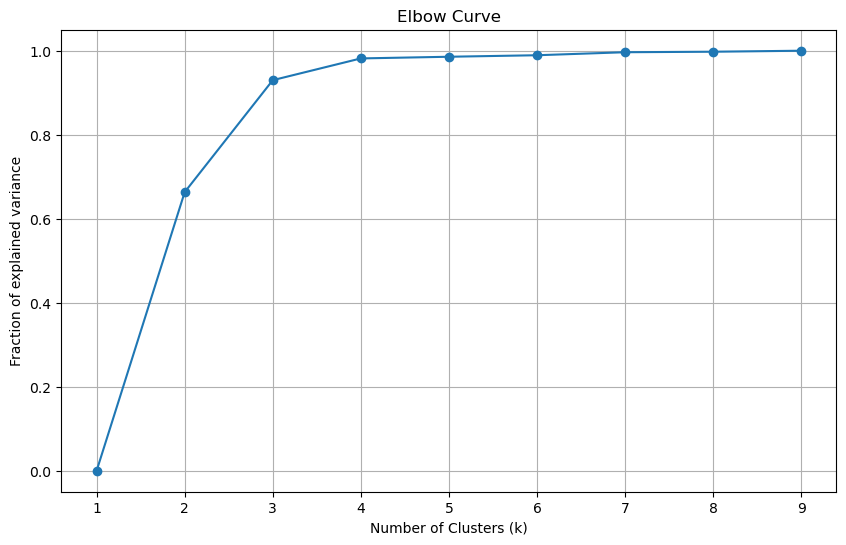

In [111]:
import matplotlib.pyplot as plt

# Number of clusters (k) for each distortion value
k_values = [i for i in range(1,len(x)+1)]

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, Allfriction, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Fraction of explained variance')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

Summary : จากภาพเมื่อสังเกตดูจะพบว่า จุดที่เป็นข้อศอกคือช่วง K = 3 ซึ่งมีค่า fraction_of_explained_variance 92.98 % ดังนั้นจึงขอสรุปว่า K = 3 เป็นค่า K ที่มีความเหมาะสมมากที่สุด

## 2. Regression

In [13]:
import pandas as pd
import numpy as np

In [14]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [17]:
train[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1. What is the median age of the training set?

In [18]:
train["Age"] = train["Age"].fillna(train["Age"].median())

In [19]:
age_median = train["Age"].median(0)
print(f'The median age of the training set is {age_median}')

The median age of the training set is 28.0


### 2.2 Convert categorical 'Embarked' and 'Sex' columns to numbers 


Embarked column

In [20]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode().item())
# print(train["Embarked"].mode())

In [21]:
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})  

Sex column

In [23]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})  

In [24]:
def min_max_scaler(data):
    min_values = np.min(data, axis=0)
    max_values = np.max(data, axis=0)
    return (data - min_values) / (max_values - min_values)

Scaling data to between 0-1 by min-max scaling

In [25]:
train['Age'] = min_max_scaler(train['Age'])
train['Pclass'] = min_max_scaler(train['Pclass'])

In [26]:
train[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,"Braund, Mr. Owen Harris",0,0.271174,1,0,A/5 21171,7.2500,NaN,0
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.472229,1,0,PC 17599,71.2833,C85,1
2,3,1,1.0,"Heikkinen, Miss. Laina",1,0.321438,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.434531,1,0,113803,53.1000,C123,0
4,5,0,1.0,"Allen, Mr. William Henry",0,0.434531,0,0,373450,8.0500,NaN,0


### 2.3. Write a logistic regression classifier using numpy 

In [27]:
def sigmoid(X):
    return np.exp(X)/1+np.exp(X)

In [28]:
class Logistic_regression():
    def __init__(self, lr = 0.01, n_iters = 1000, threshold = 0.5) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.threshold = threshold
        self.weight = None            # initial weight
        self.bias = None              # initial bias


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weight = np.zeros((n_features,1))
        self.bias = 0

        for _ in range(self.n_iters):
            li_pred = np.dot(X, self.weight) + self.bias
            prediction = sigmoid(li_pred)
        
            dw = (1/n_samples) * np.dot(X.T, (prediction - y))
            db = (1/n_samples) * np.sum(prediction - y)

            # update weight and bias
            self.weight = self.weight - dw*self.lr
            self.bias = self.bias - db*self.lr


    def predict(self, X):
        li_pred = np.dot(X, self.weight) + self.bias
        prediction = sigmoid(li_pred)

        cls_pred = [[0] if p < self.threshold else [1] for p in prediction]

        return cls_pred

In [29]:
def evaluation(y_true, y_pred):

    y_true = np.swapaxes(y_true,0,1)[0]
    y_pred = np.swapaxes(y_pred,0,1)[0]

    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))

    precision = tp/(tp+fp) if tp+fp > 0 else 0
    recall = tp/(tp+fn) if tp+fp > 0 else 0
    f1 = (2*precision*recall)/(precision+recall) if precision+recall > 0 else 0
    acc = (tp+tn)/len(y_true)

    return acc, precision, recall, f1

### 2.4 Show your precision, recall, f1-score on the training set and test set. Threshold with 0.5

In [30]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype=float)
label = np.array(train[["Survived"]].values, dtype=float)
print(data.shape)
print(label.shape)

(891, 4)
(891, 1)


In [31]:
data[0:5]

array([[1.        , 0.        , 0.27117366, 0.        ],
       [0.        , 1.        , 0.4722292 , 1.        ],
       [1.        , 1.        , 0.32143755, 0.        ],
       [0.        , 1.        , 0.43453129, 0.        ],
       [1.        , 0.        , 0.43453129, 0.        ]])

In [32]:
clf = Logistic_regression(lr=0.001, n_iters=100000,threshold=0.5)
clf.fit(data, label)

In [33]:
pred = clf.predict(data)

In [34]:
accuracy, precision, recall, f1 = evaluation(label, pred)
print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('Recall : ',recall)
print('F1-score : ',f1)


Accuracy :  0.8058361391694725
Precision :  0.8366533864541833
Recall :  0.6140350877192983
F1-score :  0.7082630691399663


### 2.5 Try adding some higher order features to your training e.g. (x1^2, x1,x2,...).

In [35]:
newdata = data.copy()

In [36]:
data[:5]

array([[1.        , 0.        , 0.27117366, 0.        ],
       [0.        , 1.        , 0.4722292 , 1.        ],
       [1.        , 1.        , 0.32143755, 0.        ],
       [0.        , 1.        , 0.43453129, 0.        ],
       [1.        , 0.        , 0.43453129, 0.        ]])

Add power on feature 'Age'

In [37]:
newdata[:, 2] = newdata[:, 2]**2

In [38]:
newdata[:5]

array([[1.        , 0.        , 0.07353515, 0.        ],
       [0.        , 1.        , 0.22300042, 1.        ],
       [1.        , 1.        , 0.1033221 , 0.        ],
       [0.        , 1.        , 0.18881744, 0.        ],
       [1.        , 0.        , 0.18881744, 0.        ]])

In [39]:
clf2 = Logistic_regression(lr=0.001, n_iters=100000,threshold=0.5)
clf2.fit(newdata, label)

In [40]:
pred = clf2.predict(newdata)

In [41]:
accuracy, precision, recall, f1 = evaluation(label, pred)
print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('Recall : ',recall)
print('F1-score : ',f1)

Accuracy :  0.8069584736251403
Precision :  0.8512396694214877
Recall :  0.6023391812865497
F1-score :  0.7054794520547946


Summary: หลังจากยกกำลัง 2 ที่ feature 'Age' ผลลัพธ์คือ 
- Accuracy เพิ่มขึ้น  0.8058361391694725 --> 0.8069584736251403
- Precision เพิ่มขึ้น 0.8366533864541833 --> 0.8512396694214877
- Recall ลดลง 0.6140350877192983 --> 0.6023391812865497
- F1-score ลดลง 0.7082630691399663 --> 0.7054794520547946

### 2.6. What happens if you reduce the number of features to just Sex and Age?

In [42]:
data = np.array(train[["Sex","Age"]].values, dtype=float)
label = np.array(train[["Survived"]].values, dtype=float)
print(data.shape)
print(label.shape)

(891, 2)
(891, 1)


In [43]:
clf = Logistic_regression(lr=0.001, n_iters=100000,threshold=0.5)
clf.fit(data, label)

In [44]:
pred = clf.predict(data)

In [45]:
accuracy, precision, recall, f1 = evaluation(label, pred)
print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('Recall : ',recall)
print('F1-score : ',f1)

Accuracy :  0.7867564534231201
Precision :  0.7420382165605095
Recall :  0.6812865497076024
F1-score :  0.7103658536585367


Summary : เมื่อเหลือเพียง 2 feature พบว่า
- Accuracy ลดลง  0.8058361391694725 --> 0.7867564534231201 
- Precision ลดลง 0.8366533864541833 --> 0.7420382165605095
- Recall เพิ่มขึ้น 0.6140350877192983 --> 0.6812865497076024
- F1-score เพิ่มขึ้น 0.7082630691399663 --> 0.7103658536585367

ซึ่งการลด feature อาจทำให้ข้อมูลที่สำคัญๆที่อาจมีปัจจัยที่ทำให้ผู้โดยสารรอดชีวิตหายไป เลยทำให้ความค่าแม่นยำโดยรวมลดลง แต่ในทางกลับกันก็ทำให้อัตราการทายถูกเพิ่มมากขึ้น(recall)

### 2.7 Show that matrix inversion yields the same answer as the gradient descent method.

In [46]:
class Linear_regression():
    def __init__(self, lr = 0.01, n_iters = 1000, threshold = 0.5) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.threshold = threshold
        self.weight = None
        self.bias = None
        self.loss = []

    def MSE_loss(self, y_true, y_pred):

        return sum(np.power(y_true - y_pred, 2)) / y_true.shape[0]
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weight = np.zeros((n_features,1))
        self.bias = 0

        for _ in range(self.n_iters):
            li_pred = np.dot(X, self.weight) + self.bias

            self.loss.append(self.MSE_loss(y, li_pred))

            dw = (1/n_samples) * np.dot(X.T, (li_pred - y))
            db = (1/n_samples) * np.sum(li_pred - y)

            self.weight = self.weight - dw*self.lr
            self.bias = self.bias - db*self.lr

    def predict(self, X):
        li_pred = np.dot(X, self.weight) + self.bias
        # prediction = sigmoid(li_pred)
        # cls_pred = [[0] if p < self.threshold else [1] for p in prediction]

        return li_pred
    
    def matrix_inversion(self,X,Y):
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((X , ones))

        out = np.linalg.inv(X.T @ X) @ X.T @ Y
        self.weight = out[:-1]
        self.bias = out[-1]

In [47]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype=float)
label = np.array(train[["Survived"]].values, dtype=float)
print(data.shape)
print(label.shape)

(891, 4)
(891, 1)


Use normal linear regression instead

In [48]:
clf = Linear_regression(lr=0.001, n_iters=100000,threshold=0.5)
clf.fit(data, label)

In [49]:
pred = clf.predict(data)
# print(pred[0:5])

In [50]:
print('Bias:', [clf.bias])
print('Weights:', clf.weight)
print('Loss (MSE):', clf.MSE_loss(label, pred))

Bias: [0.5369255505476325]
Weights: [[-0.35827393]
 [ 0.49750952]
 [-0.30956059]
 [ 0.04898112]]
Loss (MSE): [0.14513213]


### 2.8. Now try using matrix inversion instead

In [51]:
clf.matrix_inversion(data,label) ## to set weight and bias
pred = clf.predict(data)

In [52]:
print('Bias:', [clf.bias])
print('Weights:', clf.weight)
print('Loss (MSE):', clf.MSE_loss(label, pred))

Bias: [array([0.58598215])]
Weights: [[-0.37687889]
 [ 0.49086711]
 [-0.40222591]
 [ 0.04911346]]
Loss (MSE): [0.14492574]


Summary (2.7, 2.8) : weight และ bias จากการทำ linear regression อาจจะยังไม่ตรงกับการทำ matrix inversion แต่ก็มีความใกล้เคียงกันในระดับนึง อาจจะเป็นเพราะว่ายังปรับ learning rate และ iteration ที่ยังน้อยอยู่เลยทำให้โมเดลยังไม่ลู่เข้าสู้ค่าที่ควร